# Анализ пространственных данных. Домашнее задание №2

Мягкий дедлайн: __4 ноября 2020 г. 23:59__

Жесткий дедлайн (со штрафом в _50%_ от количества набранных вами за ДЗ баллов): __5 ноября 2020 г. 08:59__

Визуализация "чего-либо" __без__ выполненного основного задания оценивается в __0 баллов__

ФИО: Иванов Александр Вадимович

Группа:  MADE-DS-12

## Задание №1. Горячая точка (алгоритм - 10 баллов, визуализация - 10 баллов).

Генерируйте рандомные точки на планете Земля до тех пор, пока не попадете на территорию ``Афганистана``

1. Вы можете использовать функции принадлжености точки полигону и расстояния от точки до полигона (в метрах)
2. Предложите не наивный алгоритм поиска (генерировать __напрямую__ точку из полигона границ Афганистана __запрещено__)

Визуализируйте пошагово предложенный алгоритм при помощи ``Folium``

In [1]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import random
import folium
import datetime
from folium import plugins

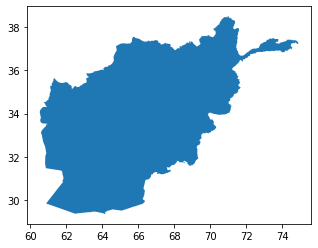

In [2]:
afghanistan = gpd.read_file('https://nominatim.openstreetmap.org/search?country=Afghanistan&polygon_geojson=1&format=geojson')

# проверим данные
afghanistan.plot()

In [15]:
def random_point():
    x = random.uniform(-180, 180)
    y = random.uniform(-90, 90)
    return x, y

points = []
point = random_point()
while not Point(point).within(afghanistan.geometry.iloc[0]):
    points.append(point)
    point = random_point()
points.append(point)

In [18]:
def plot(points):
    m = folium.Map(
        tiles='cartodbpositron',
        min_zoom=2,
    )
    features = [
        {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': point,
            },
            'properties': {
                'time': str(datetime.datetime.now() + datetime.timedelta(seconds=time * 60))[:19].replace(' ', 'T'),
                'id': 'point',
                'icon': 'circle',
                'iconstyle': {
                    'fillColor': 'red',
                    'fillOpacity': 0.6,
                    'stroke': 'false',
                    'radius': 7
                },
                'style': {'weight': 0},
            }
        } for point, time in zip(points, range(len(points)))
    ]

    features[-1]['properties']['iconstyle']['fillColor'] = 'green'

    plugins.TimestampedGeoJson(
        {
            'type': 'FeatureCollection',
            'features': features
        },
        period='PT1M',
        add_last_point=True,
        auto_play=True,
        loop=False,
        max_speed=40,
        loop_button=True,
        time_slider_drag_update=True,
    ).add_to(m)
    
    return m

In [19]:
plot(points)

Гифка, так как folium не отображается на гитхабе

![Alt Text](random_points.gif)

### С учётом расстояния

Из следующих предпосылок можно ускорить поиск:
- 1 градус около 100 км, а размеры афганистана явно больше,
- Афганистан в северном полушарии,
- Афганистан не в океане.

Ну а если без априорной информации, то можно искать с разным шагом. Размер шага будет зависеть от расстояние до Афганистана.

In [10]:
points = [random_point(), ]
while not Point(point).within(afghanistan.geometry.iloc[0]):
    distance = Point(points[-1]).distance(afghanistan.geometry.iloc[0])
    point = (
        random.choice([x for x in np.arange(
            min((point[0] - distance) % 180, (point[0] + distance) % 180),
            max((point[0] - distance) % 180, (point[0] + distance) % 180),
            distance / 2
        )]),
        random.choice([y for y in np.arange(
            min((point[1] - distance) % 180, (point[1] + distance) % 180),
            max((point[1] - distance) % 180, (point[1] + distance) % 180),
            distance / 2
        )])
    )
    points.append(point)
points.append(point)

In [13]:
plot(points)

Скорость разная, гифка с полным рандомом ускорен в 4 раза, по сравнению с этой гифкой.

![Alt Text](not_naive_random.gif)

## Задание №2. Качество жизни (20 баллов).

Для измерения показателя качества жизни в точке, найденной в предыдущем задании, вам необходимо рассчитать следующую сумму расстояний (в метрах):

1. Расстояние от точки до 5 ближайших __*__ банкоматов, находящихся в стране с наибольшим количеством объектов жилой недвижимости
2. Расстояние от точки до 5 ближайших школ, находящихся в стране с наибольшим количеством аптек в столице
3. Расстояние от точки до 5 ближайших кинотеатров, наодящихся в стране с самым большим отношением числа железнодорожных станций к автобусным остановкам в южной части __**__

__*__ При поиске _N_ ближайших объектов обязательно использовать ``R-tree``

__**__ Южной частью страны является территория, находящаяся к югу от множества точек, равноудаленных от самой северной и самой южной точек страны

In [ ]:
# put your code here

## Задание №3. Поездка по Нью-Йорку (маршрут - 20 баллов, визуализация - 10 баллов).

Добраться __на автомобиле__ от входа в ``Central Park`` __Нью-Йорка__ (со стороны ``5th Avenue``) до пересечения ``Water Street`` и ``Washington Street`` в Бруклине (откуда получаются лучшие фото Манхэттенского моста) довольно непросто - разумеется, из-за вечных пробок. Однако еще сложнее это сделать, проезжая мимо школ, где дети то и дело переходят дорогу в неположенном месте.

Вам необходимо построить описанный выше маршрут, избегая на своем пути школы. Визуализируйте данный маршрут (также добавив школы и недоступные для проезда участки дорог) при помощи ``Folium``

Данные о расположении школ Нью-Йорка можно найти [здесь](https://catalog.data.gov/dataset/2019-2020-school-point-locations)

In [ ]:
# put your code here